# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

# Exercise 1

### Single-Layer Neural Network

In [2]:
def plot_decision_boundary (nn , X, y, title =" Decision Boundary "):
    x_min , x_max = X[:, 0]. min () - 1, X[:, 0]. max () + 1
    x_values = np. linspace (x_min , x_max , 300)

    """
    6 TODO : Calculate the y_values for the decision boundary line based on the
    model ’s weights , the x_values and the model bias .
    7 """

    y_values = (-nn.weights[0]/nn.weights[1]) * x_values - (nn.bias / nn.weights[1])
     
    plt . scatter (X[:, 0], X[:, 1], c=y, s=20 , edgecolor ="k")
    plt . plot ( x_values , y_values , label =" Decision Boundary ")
    plt . xlim (x_min , x_max )
    plt . ylim (X[:, 1]. min () - 1, X[:, 1]. max () + 1)
    plt . title (title)
    plt . legend ()
    plt . show ()

In [3]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    sigmoid_output = 1 / (1 + np.exp(-z))
    return sigmoid_output

In [4]:
class SingleLayerNN:
    def __init__(self, input_dimensions):
        # Init random weights and bias
        self.weights = np.random.rand(2)
        self.bias = 1

    def predict(self, x):
        '''
        Sum up all the weights
        Add bias
        Use activation function and return output
        '''
        summed_weight = np.dot(self.weights.T, x) + self.bias
        prediction_output = sigmoid(summed_weight)
        return prediction_output

    def train(self, X, y, epochs, learning_rate):
        '''
        Define learning rate and make prediction
        Go through all of the epochs
        Predict the current states
        Calculate the loss for convenience
        Define the update rules and utilise them
        '''
        learning_rate = learning_rate
        print(f"Learning rate: {learning_rate}")

        # Decision boundary before training        
        plot_decision_boundary(self, X, y)

        for epoch in range(epochs+1):
            if epoch == epochs:
                plot_decision_boundary(self, X, y)
                return
            for i in range(len(X)):
                # Prediction
                y_pred = self.predict(x=X[i])
                # loss = -(y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred))
                # print(f"Epoch: {epoch+1}/{epoch+1}, Loss: {loss}, Value: {X[i]}")
                # Update rules
                delta = (y[i] - y_pred)
                derivative = (y_pred * (1 - y_pred))
                dw = (learning_rate * delta) * derivative  * X[i]
                db = (learning_rate * delta) * derivative
                # Update variables
                self.weights = self.weights + dw
                self.bias = self.bias + db

            # Debugging / testing behaviour
            y_pred = self.predict(x=X.T)
            loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            avg_loss = np.mean(loss)
            print(f"Average loss: {avg_loss}")



            # Make Prediction
            #y_pred = self.predict(x=X)
            # print(len(y_pred))

            # Calculating and printing loss
            # loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            # avg_loss = np.mean(loss)
            # print(f"Currently in epoch {epoch+1}/{epochs} with average loss {avg_loss}")

            # Defining update rules
            # delta = (y - y_pred)
            # derivative = y_pred * (1 - y_pred)
            # dw = learning_rate * np.dot(X.T, delta * derivative)
            # db = learning_rate * delta * derivative

            # Update parameters
            # self.weights = self.weights + dw
            # self.bias = self.bias + db
        
        
        # Decision boundary after training
        '''Call to the DecisionBoundaryFunction'''

In [5]:
# Generate synthetic data for two classes
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1

In [6]:
# Define training X, y
X = np.concatenate((features_class_0, features_class_1), axis=0)
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)), axis=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [7]:
learning_rates = [1.0, 0.1, 0.001, 0.0001, 0.00001]

Learning rate: 1.0


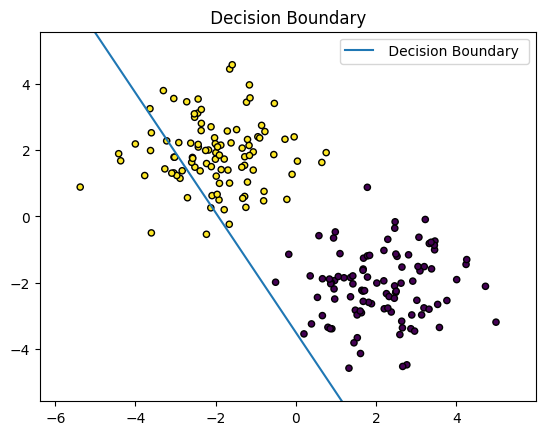

Average loss: 0.023206446685143288
Average loss: 0.015699336544611732
Average loss: 0.012515176095707634
Average loss: 0.010651474864307153
Average loss: 0.009393264389032527
Average loss: 0.008472312326889421
Average loss: 0.007761871359583804
Average loss: 0.007193119531202894
Average loss: 0.006725023020300116
Average loss: 0.006331402538574351


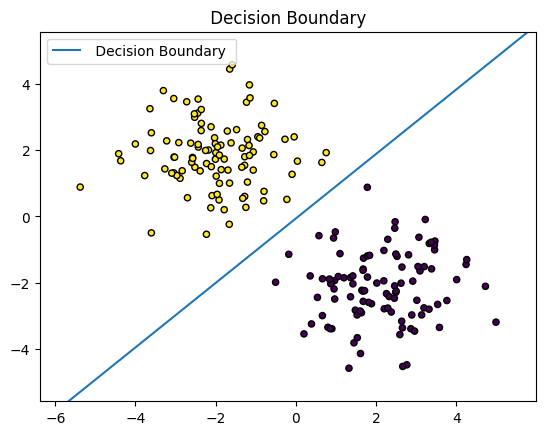

Learning rate: 0.1


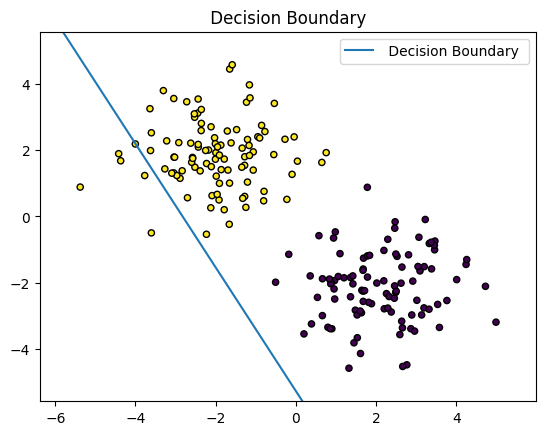

Average loss: 0.078244499250511
Average loss: 0.05439809556827254
Average loss: 0.0441129341010815
Average loss: 0.038006062727397004
Average loss: 0.03383668511926861
Average loss: 0.0307549358207415
Average loss: 0.02835678934553208
Average loss: 0.026421825724860293
Average loss: 0.024818011151792194
Average loss: 0.02346070415550851


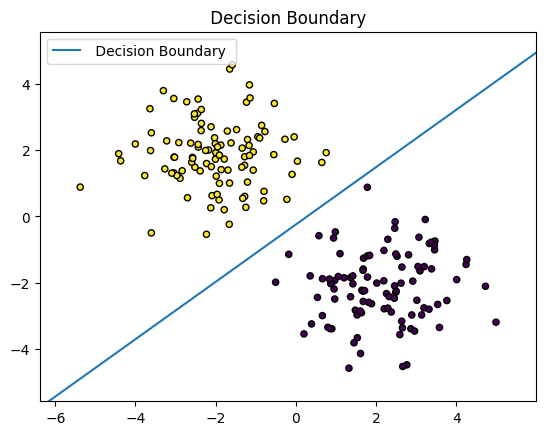

Learning rate: 0.001


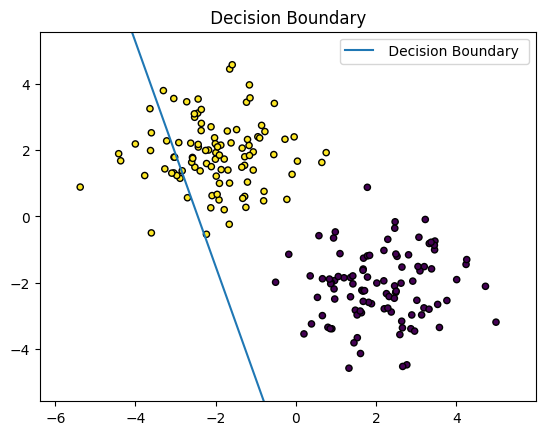

Average loss: 1.0626898232471689
Average loss: 0.9630289604807437
Average loss: 0.8701603794447366
Average loss: 0.7846916135853296
Average loss: 0.7071533447668525
Average loss: 0.6378774847144251
Average loss: 0.5768786713165331
Average loss: 0.5238136169631118
Average loss: 0.47803837943249844
Average loss: 0.4387267417403538


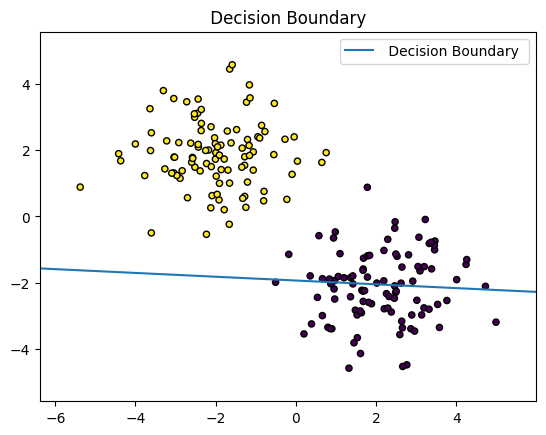

Learning rate: 0.0001


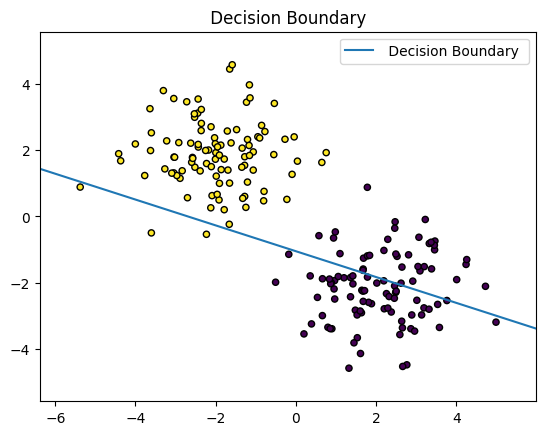

Average loss: 0.4405455139766337
Average loss: 0.43772576035144467
Average loss: 0.43493649878706864
Average loss: 0.43217736435425996
Average loss: 0.4294479952089294
Average loss: 0.42674803264141936
Average loss: 0.4240771211220236
Average loss: 0.4214349083428307
Average loss: 0.4188210452559799
Average loss: 0.41623518610842153


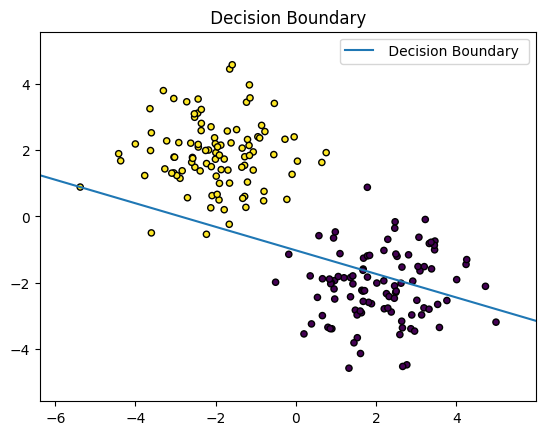

Learning rate: 1e-05


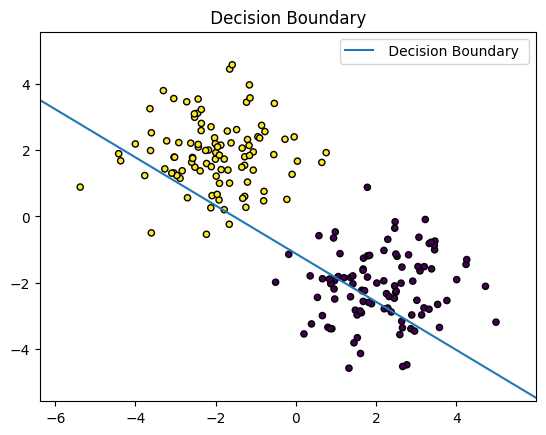

Average loss: 0.7138389872990512
Average loss: 0.7132899521067176
Average loss: 0.7127414429694591
Average loss: 0.7121934596082596
Average loss: 0.711646001743417
Average loss: 0.7110990690945436
Average loss: 0.7105526613805622
Average loss: 0.7100067783197168
Average loss: 0.709461419629572
Average loss: 0.7089165850270115


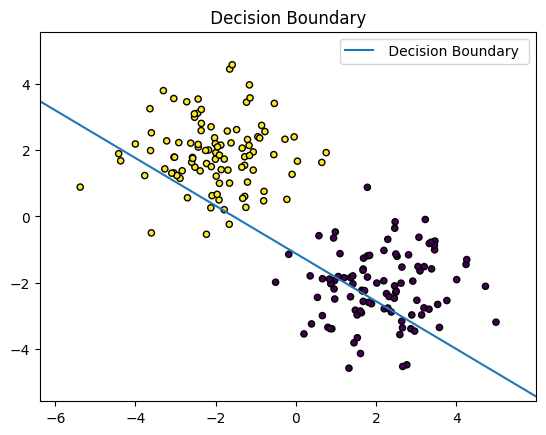

In [8]:
for learning_rate in learning_rates:
    single_layer_nn = SingleLayerNN(input_dimensions=2)
    single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=learning_rate)

Learning rate: 0.1


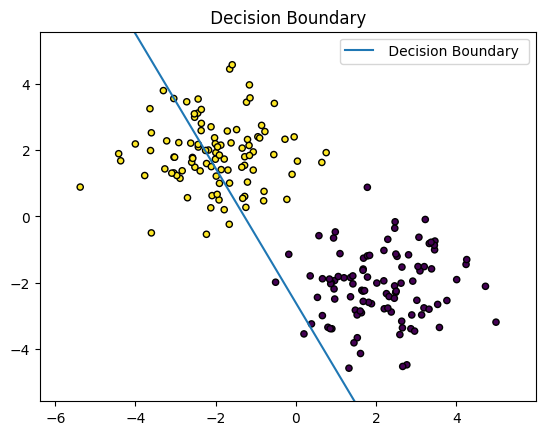

Average loss: 0.07879889707833783
Average loss: 0.0532642321139188
Average loss: 0.04287597885370021
Average loss: 0.03682213378584722
Average loss: 0.03272570555598331
Average loss: 0.02971494667302269
Average loss: 0.02738235697569591
Average loss: 0.02550755962444367
Average loss: 0.023959133230880298
Average loss: 0.02265301524727408


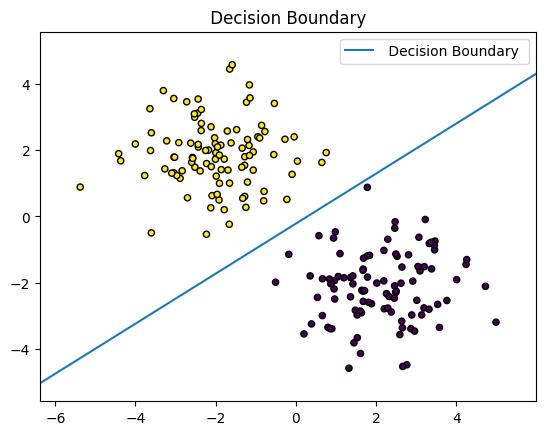

In [9]:
single_layer_nn = SingleLayerNN(input_dimensions=2)
single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=0.1)

# Exercise 2

### Backpropagation

All kinds of crazy stuff about backpropagation

# Exercise 3

### Word Embeddings

#### Load embeddings

In [10]:
# Loading pre-trained embedding model
import gensim.downloader as api
glove_vectors = api.load("glove-wiki-gigaword-100")

#### Finding most similar words 3.1

In [11]:
'''
Finding the most similar words for a given word set
'''
# Defining word set and result set
words_set = ["computer", "laptop", "queen", "king"]
similarity_results = {}

# Finding results for each word
for word in words_set:
    top_5_similar = glove_vectors.most_similar(word, topn=5)
    similarity_results[word] = top_5_similar

In [12]:
for key, val in similarity_results.items():
    print(f"Anchor word: {key}")
    print(f"{val}\n")

Anchor word: computer
[('computers', 0.8751983046531677), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175)]

Anchor word: laptop
[('laptops', 0.8518658876419067), ('computers', 0.7559927105903625), ('phones', 0.7229112386703491), ('portable', 0.7157841324806213), ('desktop', 0.7085692286491394)]

Anchor word: queen
[('princess', 0.7947244644165039), ('king', 0.7507691383361816), ('elizabeth', 0.7355712056159973), ('royal', 0.7065026760101318), ('lady', 0.7044797539710999)]

Anchor word: king
[('prince', 0.7682329416275024), ('queen', 0.7507689595222473), ('son', 0.7020888328552246), ('brother', 0.6985775828361511), ('monarch', 0.6977890729904175)]



#### Vector arithmetics 3.1

In [13]:
'''
Vector arithmetics
'''
king_man_woman = glove_vectors.most_similar(glove_vectors["king"] - glove_vectors["man"] + glove_vectors["woman"])
vehicle_computer_laptop = glove_vectors.most_similar(glove_vectors["vehicle"] - glove_vectors["computer"] + glove_vectors["laptop"])

print(f"king - man + woman\n{king_man_woman[:6]}")
print(f"\nvehicle - computer + laptop\n{vehicle_computer_laptop[:6]}")

king - man + woman
[('king', 0.8551837205886841), ('queen', 0.7834413647651672), ('monarch', 0.6933802366256714), ('throne', 0.6833109259605408), ('daughter', 0.680908203125), ('prince', 0.6713142991065979)]

vehicle - computer + laptop
[('vehicle', 0.758844256401062), ('suv', 0.7331708073616028), ('minivan', 0.7200776934623718), ('parked', 0.7133616805076599), ('jeep', 0.6985746622085571), ('car', 0.6865744590759277)]


#### Cosine similarities 3.2

In [14]:
'''
Cosine similarities
'''
# Import sklearn cosine similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Unfolding biases
professions = ["engineer", "nurse", "scientist"]
professions_vectors = [glove_vectors[profession] for profession in professions]
names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]
names_vectors = [glove_vectors[name] for name in names]

# professions = ["engineer", "nurse", "scientist"]
# names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]

# similarity_results = {}
# for profession in professions:
#     for name in names:
#         similarity_results[f"({profession, name})"] = cosine_similarity(glove_vectors[profession], glove_vectors[name])

cosine_similarities = cosine_similarity(professions_vectors, names_vectors)
similarity_df = pd.DataFrame(cosine_similarities, columns=names, index=professions)

In [15]:
similarity_df

,james,emily,mohammed,ling,juan,fatima
engineer,0.439558,0.157770,0.258593,0.116367,0.273622,-0.071193
nurse,0.238469,0.362514,0.156243,0.200624,0.167197,0.228209
scientist,0.418299,0.234902,0.286468,0.267843,0.181185,0.092707


#### PCA 3.2

In [16]:
# PCA implementation
# Defining the vectors for PCA
words = ["king", "queen", "man", "woman", "nurse", "engineer"]
word_vectors = [glove_vectors[word] for word in words]

In [17]:
# PCA from sklearn
from sklearn.decomposition import PCA

# Defining pca in 2d (2 components)
pca = PCA(n_components=2)
components = pca.fit_transform(word_vectors)
print(components)

[[ 3.75404532  1.09110453]
 [ 3.17142927 -0.20704364]
 [-0.62538379 -1.56858493]
 [-1.31816933 -2.79988993]
 [-2.63732893 -0.19950647]
 [-2.34459255  3.68392044]]


Text(0.5, 1.0, '2D PCA of Word Embeddings')

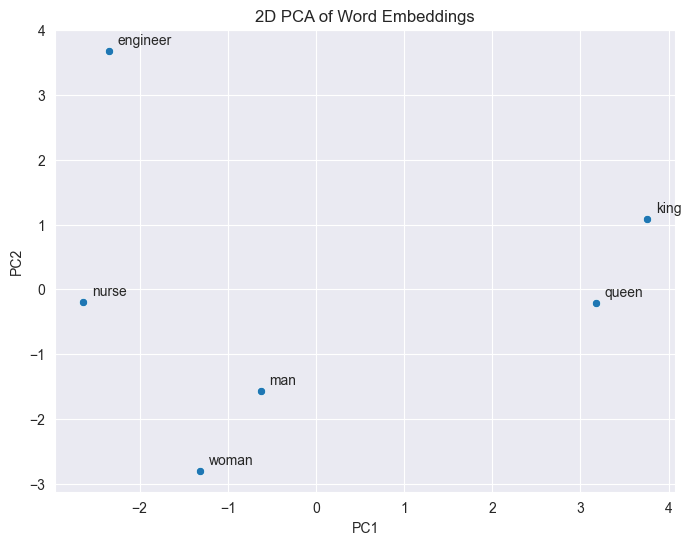

In [18]:
# Defining components
pc1 = components[:, 0]
pc2 = components[:, 1]

# Plotting the components
sns.set_style("darkgrid")
# Plot the words
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pc1, y=pc2)

# for word, pc1, pc2 in zip(words, pc1, pc2):
#     sns.scatterplot(x=pc1, y=pc2, hue=word)
#     # plt.scatter(x=pc1, y=pc2, label=word)

for i, txt in enumerate(words):
    ax.text(pc1[i]+0.1, pc2[i]+0.1, txt)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of Word Embeddings")

# Exercise 4

### Preperation

In [19]:
# Prefixes for testing
prefixes = ["It is not for me to", "Sherlock Holmes is", "The mystery of"]
prefixes

['It is not for me to', 'Sherlock Holmes is', 'The mystery of']

In [20]:
import re

def load_and_tokenize(file_path, encoding="utf-8"):
    # Load the file
    with open(file=file_path, encoding=encoding) as f:
        text=f.read()

    # Tokenize and remove punctuation
    tokenized_text = re.findall(r"[\w ’]+|[. ,!?;]", text.lower())
    words = [word for word in tokenized_text if word.isalpha()]

    # Return
    return tokenized_text, words
    

In [21]:
file_path = "./text_corpus.txt"
tokenized_text, words = load_and_tokenize(file_path=file_path)
print(tokenized_text[:5])
print(words[:5])

['the project gutenberg ebook of the adventures of sherlock holmes', '    ', 'this ebook is for the use of anyone anywhere in the united states and', 'most other parts of the world at no cost and with almost no restrictions', 'whatsoever']
['whatsoever', 'gutenberg', 'org', 'title', 'author']


#### 4.1 - Frequency count (Based on the text corpus)

In [22]:
# Result dictionary
freq_pred_res = []

# Filling result dictionary
for prefix in prefixes:
    last_word = prefix.split()[-1]
    prefix_result = {}
    for word in words:
        if word in prefix_result:
            prefix_result[word] += 1
            continue
        prefix_result[word] = 1
    pred_next_word = max(prefix_result)
    freq_pred_res.append([last_word, pred_next_word])

In [23]:
'''
# Result dictionary
freq_pred_res = []

# Filling result dictionary
for prefix in prefixes:
    last_word = prefix.split()[-1]
    prefix_result = {}
    for i, word in enumerate(words):
        if word == last_word:
            next_word = words[i+1]
            if next_word in prefix_result:
                prefix_result[next_word] += 1
                continue
            prefix_result[next_word] = 1
    pred_next_word = max(prefix_result)
    freq_pred_res.append((last_word, pred_next_word))
'''

'\n# Result dictionary\nfreq_pred_res = []\n\n# Filling result dictionary\nfor prefix in prefixes:\n    last_word = prefix.split()[-1]\n    prefix_result = {}\n    for i, word in enumerate(words):\n        if word == last_word:\n            next_word = words[i+1]\n            if next_word in prefix_result:\n                prefix_result[next_word] += 1\n                continue\n            prefix_result[next_word] = 1\n    pred_next_word = max(prefix_result)\n    freq_pred_res.append((last_word, pred_next_word))\n'

In [24]:
freq_pred_res

[['to', 'yourself'], ['is', 'yourself'], ['of', 'yourself']]

#### 4.2

In [89]:
# Function for generating n_gram_models
def gram_model(n):
    model_counts = {}

    for i in range(len(words)):
        gram = tuple(words[i:i+n])
        
        if gram in model_counts:
            model_counts[gram] += 1
            continue
        else:
            model_counts[gram] = 1
    
    return model_counts

In [93]:
# Instantiating models
one_gram_model = gram_model(n=1)
two_gram_model = gram_model(n=2)
three_gram_model = gram_model(n=3)

In [131]:
test_tuple = tuple(("gutenberg", "org", "lol"))

test_tuple[:-1]

to_bigrams = []
for key, val in three_gram_model.items():
    if isinstance(key, tuple) and key[:-1] == ("gutenberg", "org"):
        to_bigrams.append((key, val))
# res = two_gram_model[test_tuple]
# print(res)
to_bigrams

[(('gutenberg', 'org', 'title'), 1),
 (('gutenberg', 'org', 'license'), 1),
 (('gutenberg', 'org', 'e'), 1),
 (('gutenberg', 'org', 'plain'), 1),
 (('gutenberg', 'org', 'profit'), 1),
 (('gutenberg', 'org', 'contact'), 1),
 (('gutenberg', 'org', 'donate'), 2)]

In [144]:
grams_combined = [one_gram_model, two_gram_model, three_gram_model]
gram_results = {}

for n in range(1, 4):
    gram = grams_combined[n-1]
    for prefix in prefixes:
        print(tuple(prefix.split()[-n:]))


{('whatsoever',): 1, ('gutenberg',): 19, ('org',): 9, ('title',): 1, ('author',): 1, ('language',): 1, ('credits',): 1, ('contents',): 1, ('i',): 11, ('was',): 3, ('instrument',): 1, ('adler',): 2, ('centred',): 1, ('soul',): 2, ('books',): 1, ('nature',): 1, ('remembered',): 2, ('door',): 5, ('story',): 2, ('created',): 1, ('seven',): 2, ('indeed',): 14, ('fancy',): 3, ('then',): 16, ('jane',): 1, ('again',): 3, ('iodoform',): 1, ('forefinger',): 1, ('frequently',): 1, ('well',): 89, ('night',): 36, ('said',): 3, ('means',): 1, ('data',): 4, ('it',): 23, ('written',): 1, ('stiff',): 2, ('peculiar',): 1, ('e',): 23, ('g',): 2, ('p',): 2, ('t',): 1, ('gesellschaft',): 1, ('company',): 1, ('co',): 2, ('papier',): 1, ('eg',): 1, ('eglow',): 1, ('german',): 2, ('remarkable',): 1, ('glass',): 1, ('mills',): 1, ('that',): 7, ('precisely',): 7, ('remains',): 2, ('face',): 4, ('doubts',): 1, ('whistled',): 1, ('yes',): 101, ('passage',): 4, ('taste',): 1, ('beryl',): 1, ('mask',): 1, ('watson'

In [145]:
def predict_next_word_ngram(prefix, ngrams_model, n):
    if len(prefix) < n:
        return None  # Handle prefixes shorter than n-gram length
    prev_ngram = tuple(prefix[-n:])
    next_word_counts = ngrams_model.get(prev_ngram, {})
    next_word = max(next_word_counts, key=next_word_counts.get, default=None)
    return next_word

In [147]:
results = []
for prefix in prefixes:
    current_prefix = prefix.split()[-2:]
    print(current_prefix)

['me', 'to']
['Holmes', 'is']
['mystery', 'of']


#### Pre-trained language model

# Exercise 5

### Image Classification

All kinds of crazy stuff about image classification